In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/ML /Machine Learning Project /Placement_Data.csv")

1.sl_no : Serial Number,

2.ssc_p : Secondary Education percentage- 10th Grade

3.ssc_b : Board of Education- Central/ Others

4.hsc_p : Higher Secondary Education percentage- 12th Grade

5.hsc_b : Board of Education- Central/ Others

6.hsc_s : Specialization in Higher Secondary Education

7.degree_p : Degree Percentage

8.degree_t : Under Graduation(Degree type)- Field of degree education

9.workex : Work Experience

10.etest_p : Employability test percentage ( conducted by college)

11.specialisation : Post Graduation(MBA)- Specialization

12.mba_p : MBA percentage

13.status : Status of placement- Placed/Not placed

14.salary : Salary if the student is placed

In [6]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [7]:
#all the columns
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [8]:
#shape
df.shape


(215, 15)

In [9]:

df["ssc_p"].mean()

67.30339534883721

In [10]:
df["ssc_p"].max()

89.4

In [11]:
df[df.ssc_p==df.ssc_p.max()].shape[0]

1

In [12]:
df[df["ssc_p"]==df["ssc_p"].max()]["status"]

145    Placed
Name: status, dtype: object

In [13]:
#number of student places or not placed
df["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [14]:
#the most common degree student who palced.
df[df["status"]=="Placed"]["degree_t"].value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64

In [15]:
#number of unique degree in dataset
df["degree_t"].nunique()

3

In [16]:
#correlation between 10th and 12th percentage
df[["ssc_p","hsc_p"]].corr()

,ssc_p,hsc_p
ssc_p,1.000000,0.511472
hsc_p,0.511472,1.000000


In [17]:
#correlation metrix
df.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


### Data Pre Processing

In [18]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [19]:
#-----first step for data pre processing to indentify the column which is not required for our model and remove from the data set
df.drop(columns=["sl_no"],inplace=True)

In [20]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [21]:
#checking the  null values and if there is null values fill 
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [22]:
# so there is salary which is having null values so we have to remove the null or fill the nulls
# fill the null
df.fillna(0,inplace=True)

#Data Visualization

In [23]:
import seaborn as sns

In [24]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, '10th vs 12th percentage')

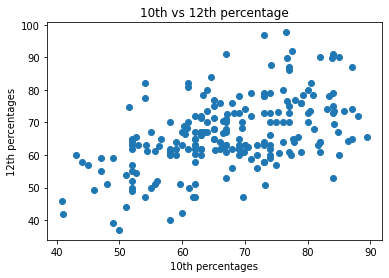

In [25]:
#scatter plot between 10th and 12th percentage
plt.scatter(df["ssc_p"],df["hsc_p"])
plt.xlabel("10th percentages")
plt.ylabel("12th percentages")
plt.title("10th vs 12th percentage")


In [26]:
#let draw a scatter plot between 10th abd 12th percentage based on placed and not placed
#lets give colours to scatter chart
colors={"Placed":"tab:green","Not Placed":"tab:red"}
df["status"].map(colors)

0      tab:green
1      tab:green
2      tab:green
3        tab:red
4      tab:green
         ...    
210    tab:green
211    tab:green
212    tab:green
213    tab:green
214      tab:red
Name: status, Length: 215, dtype: object

Text(0.5, 1.0, '10th vs 12th percentage based on Places or Not Placed')

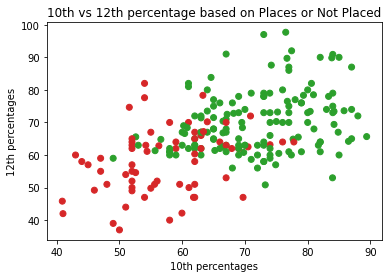

In [27]:
plt.scatter(df["ssc_p"],df["hsc_p"],c=df["status"].map(colors))
plt.xlabel("10th percentages")
plt.ylabel("12th percentages")
plt.title("10th vs 12th percentage based on Places or Not Placed")

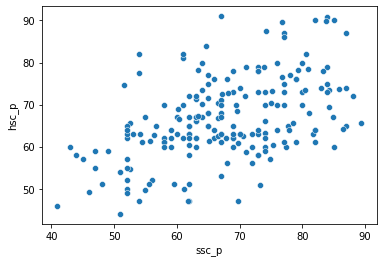

In [209]:
#seaborn scatter plot
colors={"Placed":"tab:green","Not Placed":"tab:red"}
sns.scatterplot(x=df["ssc_p"],y=df["hsc_p"],hue=df["status"].map(colors))


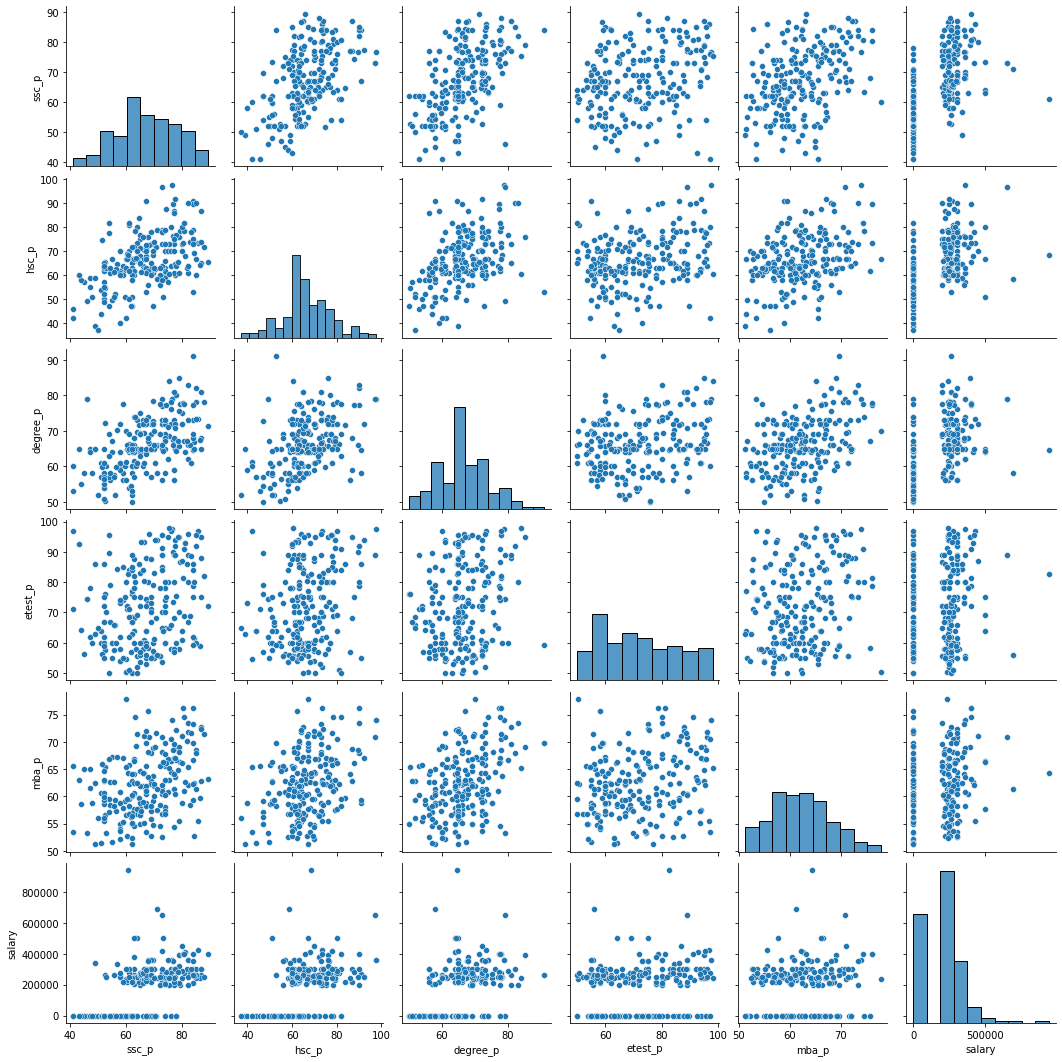

In [29]:
#Pairplots between all continous columns
sns.pairplot(df)

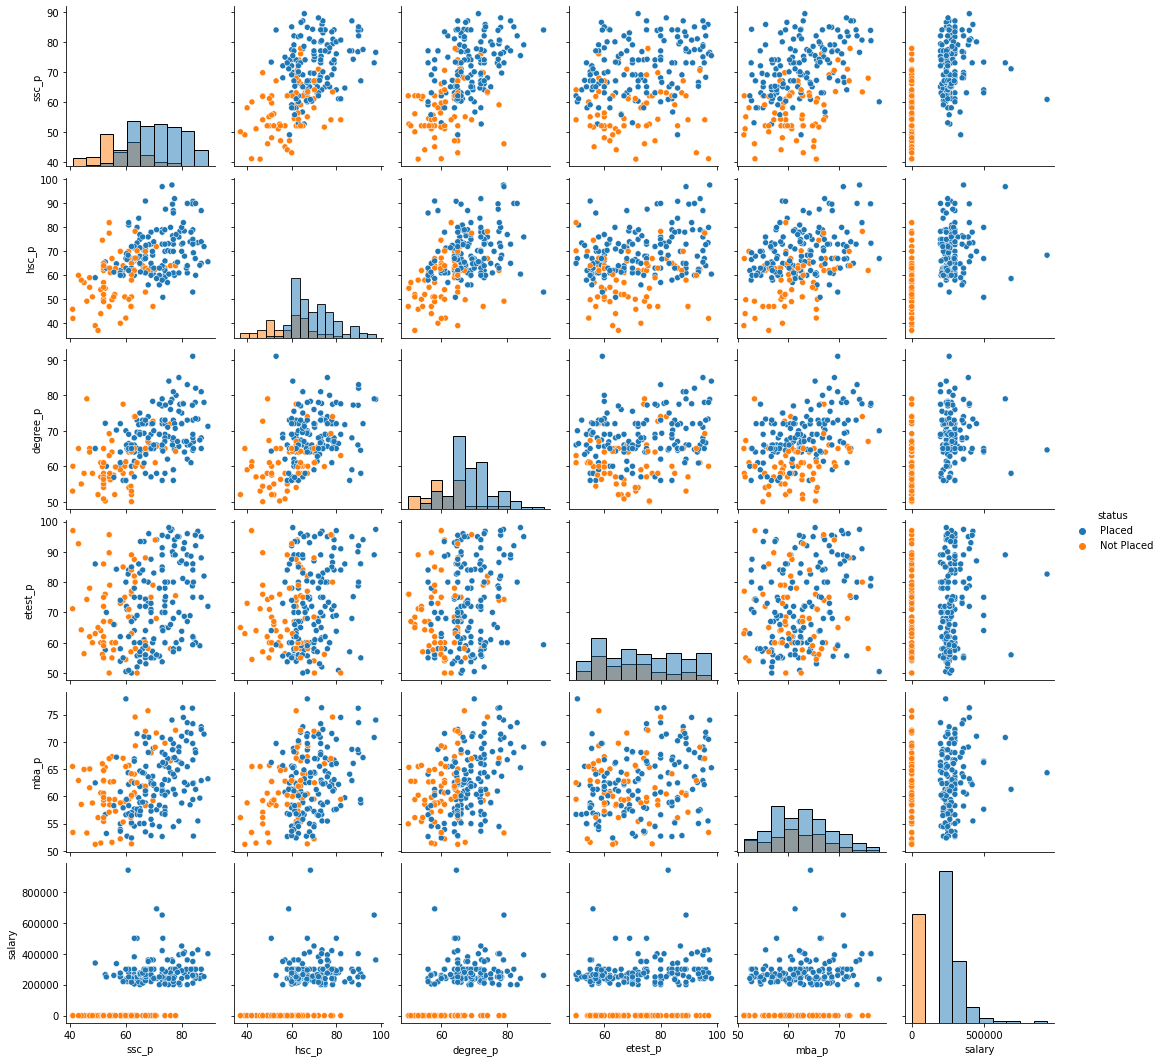

In [30]:
sns.pairplot(df,hue="status",diag_kind="hist")

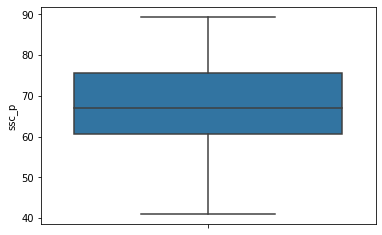

In [31]:
sns.boxplot(y="ssc_p", data=df)

In [32]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


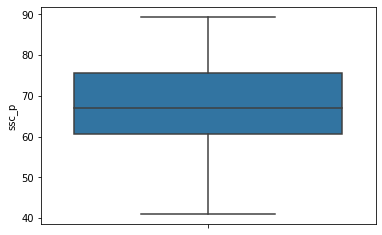

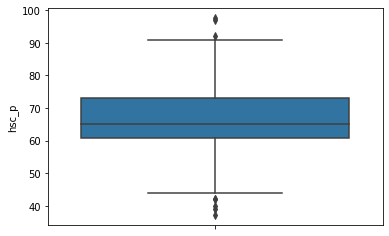

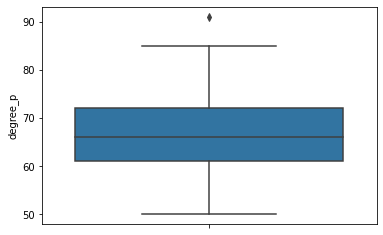

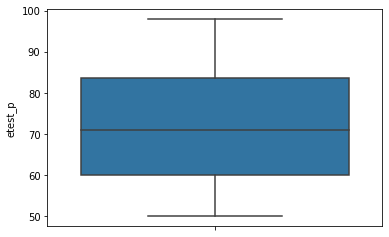

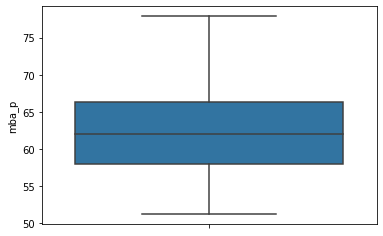

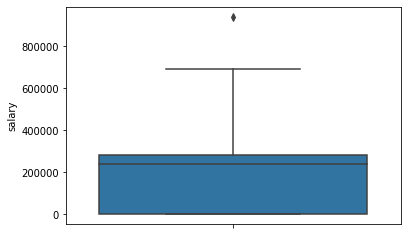

In [33]:
column=["ssc_p","hsc_p","degree_p","etest_p","mba_p","salary"]
for i in column:
  plt.figure()
  sns.boxplot(y=i, data=df)

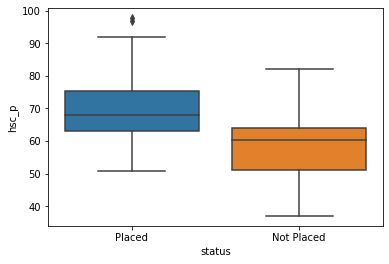

In [34]:
#boxplot of 12th percenatge based on placed and not placed students
sns.boxplot(y="hsc_p",data=df,x="status")



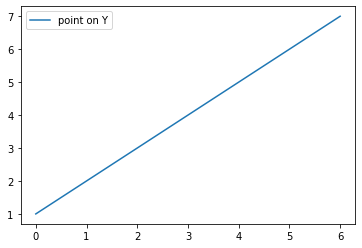

In [35]:
#eg 
y=[1,2,3,4,5,6,7]
plt.plot(y,label="point on Y")
plt.legend()

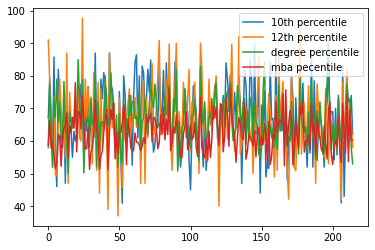

In [36]:
#lineplot for 10th 12th , degree and MBA percentage
plt.plot(df["ssc_p"], label="10th percentile")
plt.plot(df["hsc_p"], label="12th percentile")
plt.plot(df["degree_p"], label="degree percentile")
plt.plot(df["mba_p"], label="mba pecentile")
plt.legend()

In [37]:
# correlation between continous columns
df.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


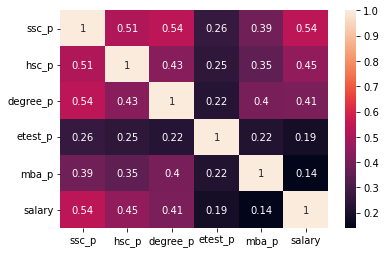

In [38]:
#heat map of correlation
sns.heatmap(df.corr(), annot=True)

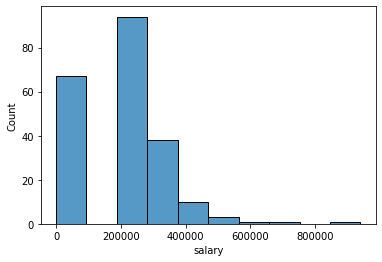

In [39]:
#histogram of salary of students
sns.histplot(df["salary"])

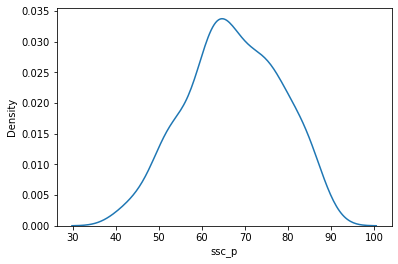

In [40]:
#distrubution of 10th grade percentage
sns.kdeplot(df["ssc_p"])
#kernal dencity estimate

#Outlier Analysis


In [41]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [42]:
column=["ssc_p","hsc_p","degree_p","etest_p","mba_p","salary"]


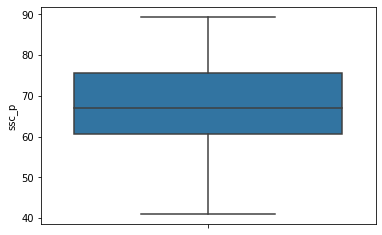

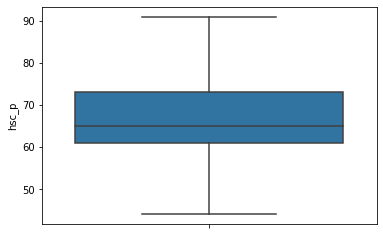

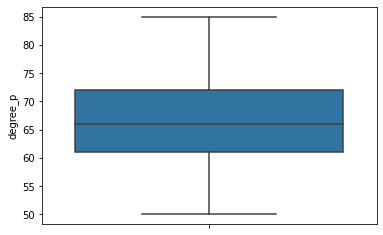

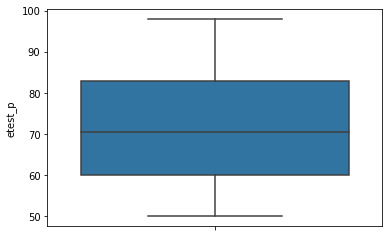

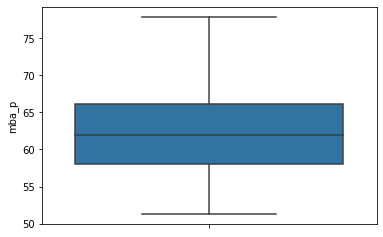

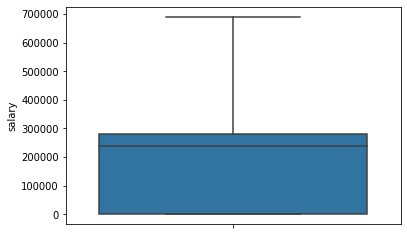

In [43]:
#removing the outliers from the data
for i in column:
  percentile25=df[i].quantile(0.25)
  percentile75=df[i].quantile(0.75)
  IQR=percentile75-percentile25
  upperlimit=percentile75+(1.5*IQR)
  lowerlimit=percentile25-(1.5*IQR)
  df=df[(df[i]<upperlimit) & (df[i]>lowerlimit)]
  plt.figure()
  sns.boxplot(y=i, data=df)

# Label Encoding 

In [44]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [47]:
df["ssc_b"]

0       Others
1      Central
2      Central
3      Central
4      Central
        ...   
210     Others
211     Others
212     Others
213     Others
214    Central
Name: ssc_b, Length: 205, dtype: object

In [48]:
df["ssc_b"]=le.fit_transform(df["ssc_b"])

In [49]:
df["ssc_b"]

0      1
1      0
2      0
3      0
4      0
      ..
210    1
211    1
212    1
213    1
214    0
Name: ssc_b, Length: 205, dtype: int64

In [50]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,1,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,0,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,0,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,0,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,0,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [51]:
col=["gender","hsc_b","degree_t","workex","specialisation","status","hsc_s"]

In [52]:
for i in col:
  df[i]=le.fit_transform(df[i])

In [53]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


#Linear Regression Model


Extract the independent and dependent variables


In [54]:
x=df.iloc[:,0:-1].values

In [55]:
y=df.iloc[:,-1].values


In [56]:
x

array([[ 1.  , 67.  ,  1.  , ...,  1.  , 58.8 ,  1.  ],
       [ 1.  , 79.33,  0.  , ...,  0.  , 66.28,  1.  ],
       [ 1.  , 65.  ,  0.  , ...,  0.  , 57.8 ,  1.  ],
       ...,
       [ 1.  , 67.  ,  1.  , ...,  0.  , 69.72,  1.  ],
       [ 0.  , 74.  ,  1.  , ...,  1.  , 60.23,  1.  ],
       [ 1.  , 62.  ,  0.  , ...,  1.  , 60.22,  0.  ]])

In [57]:
y

array([270000., 200000., 250000.,      0., 425000.,      0.,      0.,
       252000., 231000.,      0., 260000., 250000.,      0., 218000.,
            0., 200000., 300000.,      0.,      0., 236000., 265000.,
       393000., 360000., 300000.,      0., 240000., 265000., 350000.,
            0., 250000.,      0., 278000., 260000.,      0., 300000.,
            0., 320000., 240000., 411000., 287000.,      0., 300000.,
       200000.,      0.,      0., 204000., 250000., 200000.,      0.,
            0., 450000., 216000., 220000., 240000., 360000., 268000.,
       265000., 260000., 300000., 240000.,      0., 240000.,      0.,
       275000., 275000.,      0., 275000., 360000., 240000., 240000.,
       218000., 336000.,      0., 230000., 500000., 270000.,      0.,
       240000., 300000.,      0., 300000., 300000., 400000., 220000.,
            0., 210000., 210000., 300000.,      0., 230000.,      0.,
       260000., 420000., 300000.,      0., 220000.,      0.,      0.,
       380000., 3000

#**Spliting the dataset into training and testing**


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

#**Used standardization for scalling the data  and performed Linear Regression**


---



In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
x_train=sc.fit_transform(x_train)

In [63]:
x_train

array([[ 0.71753152,  0.60502531, -0.93051258, ..., -0.88264929,
        -0.73314211,  0.68640647],
       [-1.39366699,  0.92686572,  1.0746765 , ..., -0.88264929,
         0.26554735,  0.68640647],
       [ 0.71753152, -0.43622305, -0.93051258, ..., -0.88264929,
        -1.34335378,  0.68640647],
       ...,
       [ 0.71753152,  0.60502531,  1.0746765 , ...,  1.13295282,
        -0.96197148,  0.68640647],
       [-1.39366699, -0.05758728, -0.93051258, ...,  1.13295282,
         1.74495589, -1.45686272],
       [-1.39366699,  0.88900214,  1.0746765 , ..., -0.88264929,
        -0.14421688,  0.68640647]])

In [64]:
x_test=sc.transform(x_test)

In [65]:
x_test

array([[ 0.71753152,  1.83559156, -0.93051258,  0.76526393, -1.211504  ,
         1.09271933, -0.12085542,  1.45174816,  1.3540064 ,  0.30430063,
         1.13295282,  1.80349364,  0.68640647],
       [-1.39366699,  1.07832002,  1.0746765 ,  0.96706395,  0.82542031,
        -0.63084827,  2.85578334, -0.71525153, -0.73854895,  1.80192015,
        -0.88264929,  1.23053326,  0.68640647],
       [-1.39366699, -2.3294019 , -0.93051258, -0.64733622,  0.82542031,
         1.09271933, -0.12085542, -0.71525153, -0.73854895,  1.62669866,
         1.13295282,  0.14137637, -1.45686272],
       [ 0.71753152, -1.25028996, -0.93051258, -0.5343282 , -1.211504  ,
        -0.63084827, -1.43057648, -0.71525153, -0.73854895, -0.29474718,
         1.13295282,  0.09348185, -1.45686272],
       [-1.39366699,  0.1317306 , -0.93051258,  1.16886397, -1.211504  ,
        -0.63084827,  0.92096814, -0.71525153, -0.73854895,  0.00477672,
         1.13295282,  0.10944669,  0.68640647],
       [ 0.71753152, -1.129126

In [66]:
#linear Regression
from sklearn.linear_model import LinearRegression

In [67]:
reg=LinearRegression()

In [68]:
reg.fit(x_train,y_train)

LinearRegression()

In [69]:
reg.intercept_

187895.42483660122

In [70]:
reg.coef_

array([ 11811.08032642,   4098.50983022,   1303.5547885 ,  -6285.41165318,
        -3692.92861591,    389.20360453, -13466.73828307,  11769.91216011,
          562.86360183,   2253.20146498,  -6524.48726664,  13592.66084468,
       131314.9576229 ])

In [71]:
#predicting the data
y_pred=reg.predict(x_test)

In [72]:
y_pred

array([ 3.30189779e+05,  2.37271320e+05, -3.81989552e+04,  9.95767855e+03,
        2.30648664e+05,  2.74855899e+05, -6.94724468e+04,  2.68538527e+05,
       -2.15768648e+04,  2.31923793e+05,  2.95445875e+05,  2.54667418e+05,
        2.51593002e+05,  2.57705277e+05,  2.66031883e+05,  2.49921614e+05,
        1.69423322e+04,  2.88896104e+05,  2.41462915e+05,  2.48675629e+05,
        2.93771821e+04,  2.33743489e+05,  2.48123752e+05,  2.77353305e+05,
        2.54016917e+05, -6.98343195e+03,  4.30238297e+04, -2.27472533e+02,
        2.86271808e+05,  2.69174829e+05,  2.68784476e+05,  2.47739053e+05,
        1.22999348e+04,  2.68121658e+05,  2.32109302e+05,  2.67247150e+05,
        2.71761939e+05, -1.09741541e+04,  2.85934985e+05,  2.51146010e+05,
       -1.32298583e+04,  2.77806977e+05,  2.78022518e+05,  2.60714126e+05,
        3.14202242e+05,  2.59879666e+05,  2.95409051e+05,  2.53995924e+04,
        2.89392168e+05,  2.37978604e+05,  3.08905426e+05,  2.96405995e+05])

In [73]:
y_test

array([300000., 393000.,      0.,      0., 300000., 260000.,      0.,
       240000.,      0., 250000., 400000., 265000., 233000., 265000.,
       252000., 275000.,      0., 336000., 240000., 300000.,      0.,
       300000., 200000., 236000., 240000.,      0.,      0.,      0.,
       400000., 360000., 300000., 220000.,      0., 300000., 287000.,
       250000., 265000.,      0., 360000., 216000.,      0., 250000.,
       264000., 380000., 300000., 360000., 276000.,      0., 500000.,
       250000., 450000., 240000.])

#**Evaluate the model using MSE, RMSE and R square**


In [74]:
from sklearn import metrics

In [75]:
MSE=metrics.mean_absolute_error(y_test,y_pred)
MSE

43507.77726773963

In [76]:
RMSE=np.sqrt(MSE)
RMSE

208.58517988519614

In [77]:
R2 = metrics.r2_score(y_test,y_pred)

In [78]:
#accurancy of the model is 80%
R2

0.80931927353996

#**Logistics Regression Model**

In [79]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


**Extract the independent and dependent (status)variable**

In [80]:
X=df.drop(["status","salary"],axis=1).values

In [81]:
X

array([[ 1.  , 67.  ,  1.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [82]:
Y=df["status"].values

In [83]:
Y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0])

**Split the dataset into training and testing dataset**


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test , Y_train, Y_test= train_test_split(X,Y,test_size=0.25,random_state=50)

** USe standardization**

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
ss=StandardScaler()

In [88]:
X_train=ss.fit_transform(X_train)


In [89]:
X_test=ss.fit_transform(X_test)

**Build the logistic Regression Model**

In [90]:
Y_train

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [91]:
Y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1])

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
classifier=LogisticRegression()

In [94]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [95]:
Y_pred=classifier.predict(X_test)

In [96]:
Y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [97]:
#fpr,tpr,threshold=metrics.roc_curve(Y_test,classifier.predict(X_train)[:,1])

In [98]:
#plt.plot(fpr,tpr)

**confusion metrix with heatmap**



In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
confusion_matrix(Y_test,Y_pred)

array([[12,  4],
       [ 2, 34]])

In [101]:
tn,fp,fn,tp=confusion_matrix(Y_test,Y_pred).ravel()

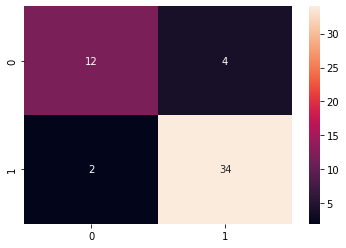

In [102]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

** Evaluating the model and Finding Accuracy**


In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(Y_test,Y_pred)
#we have 88% accurate model 

0.8846153846153846


**Find out the auc roc score**



In [105]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred)

0.8472222222222222

**Find out number of 0 classes in Y_test**


In [106]:
Y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1])

In [107]:
sum(Y_test==0)

16

In [108]:
sum(Y_test==1)

36

**find out the recall and precision**

In [109]:
recall=tp/(tp+fn)

In [110]:
recall

0.9444444444444444

In [111]:
precision=tp/(tp+fp)

In [112]:
precision

0.8947368421052632

**Created a classification report  **

In [113]:
from sklearn.metrics import classification_report


In [114]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.89      0.94      0.92        36

    accuracy                           0.88        52
   macro avg       0.88      0.85      0.86        52
weighted avg       0.88      0.88      0.88        52



In [115]:
p_forClass0=(tn/(tn+fn))

In [116]:
p_forClass0

0.8571428571428571

In [117]:
r_forClass0=tn/(tn+fp)

In [118]:
r_forClass0

0.75

In [119]:
f1_forClass0=(2*(p_forClass0)*(r_forClass0))/((p_forClass0)+(r_forClass0))

In [120]:
f1_forClass0

0.7999999999999999

In [121]:
#probabiltu method for Y_predection 
classifier.predict_proba(X_test)

array([[8.83894927e-02, 9.11610507e-01],
       [6.78588665e-01, 3.21411335e-01],
       [9.88722600e-01, 1.12774001e-02],
       [1.92537367e-01, 8.07462633e-01],
       [1.18332161e-01, 8.81667839e-01],
       [1.75280378e-01, 8.24719622e-01],
       [2.18534735e-01, 7.81465265e-01],
       [2.80234858e-02, 9.71976514e-01],
       [9.11668085e-03, 9.90883319e-01],
       [5.71959117e-01, 4.28040883e-01],
       [7.79030051e-04, 9.99220970e-01],
       [4.84827123e-04, 9.99515173e-01],
       [3.23996734e-03, 9.96760033e-01],
       [1.47987512e-01, 8.52012488e-01],
       [4.17752601e-03, 9.95822474e-01],
       [2.89421011e-02, 9.71057899e-01],
       [4.43814837e-01, 5.56185163e-01],
       [7.33752700e-02, 9.26624730e-01],
       [9.88801429e-01, 1.11985711e-02],
       [8.95575192e-01, 1.04424808e-01],
       [9.61063953e-01, 3.89360470e-02],
       [2.34162272e-01, 7.65837728e-01],
       [9.57203163e-01, 4.27968370e-02],
       [3.27829704e-02, 9.67217030e-01],
       [8.931384

In [122]:
# by default prbability is >= 0.5  threshold in logistic model and we can also change the threshold , in this i have fix the thresholf in 0.7 

Y_pred2=(classifier.predict_proba(X_test)[:,1]>=0.7).astype(int)

In [123]:
Y_pred2

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1])

In [124]:
Y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

#**DECISION TREE MODEL**#

In [125]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [126]:
x=df.drop(["status","salary"],axis=1).values
x

array([[ 1.  , 67.  ,  1.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [127]:
y=df["status"].values
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0])

In [128]:
from sklearn.model_selection import train_test_split


In [129]:
x_train, x_test , y_train, y_test= train_test_split(X,Y,test_size=0.30,random_state=50)

In [130]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [131]:
dc.fit(x_train, y_train)

DecisionTreeClassifier()

In [132]:
y_pred=dc.predict(x_test)

In [133]:
confusion_matrix(y_test,y_pred)

array([[15,  6],
       [ 8, 33]])

In [134]:
accuracy_score(y_test,y_pred)

0.7741935483870968

In [135]:
from sklearn.metrics import classification_report

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        21
           1       0.85      0.80      0.83        41

    accuracy                           0.77        62
   macro avg       0.75      0.76      0.75        62
weighted avg       0.78      0.77      0.78        62



In [137]:
from sklearn import tree

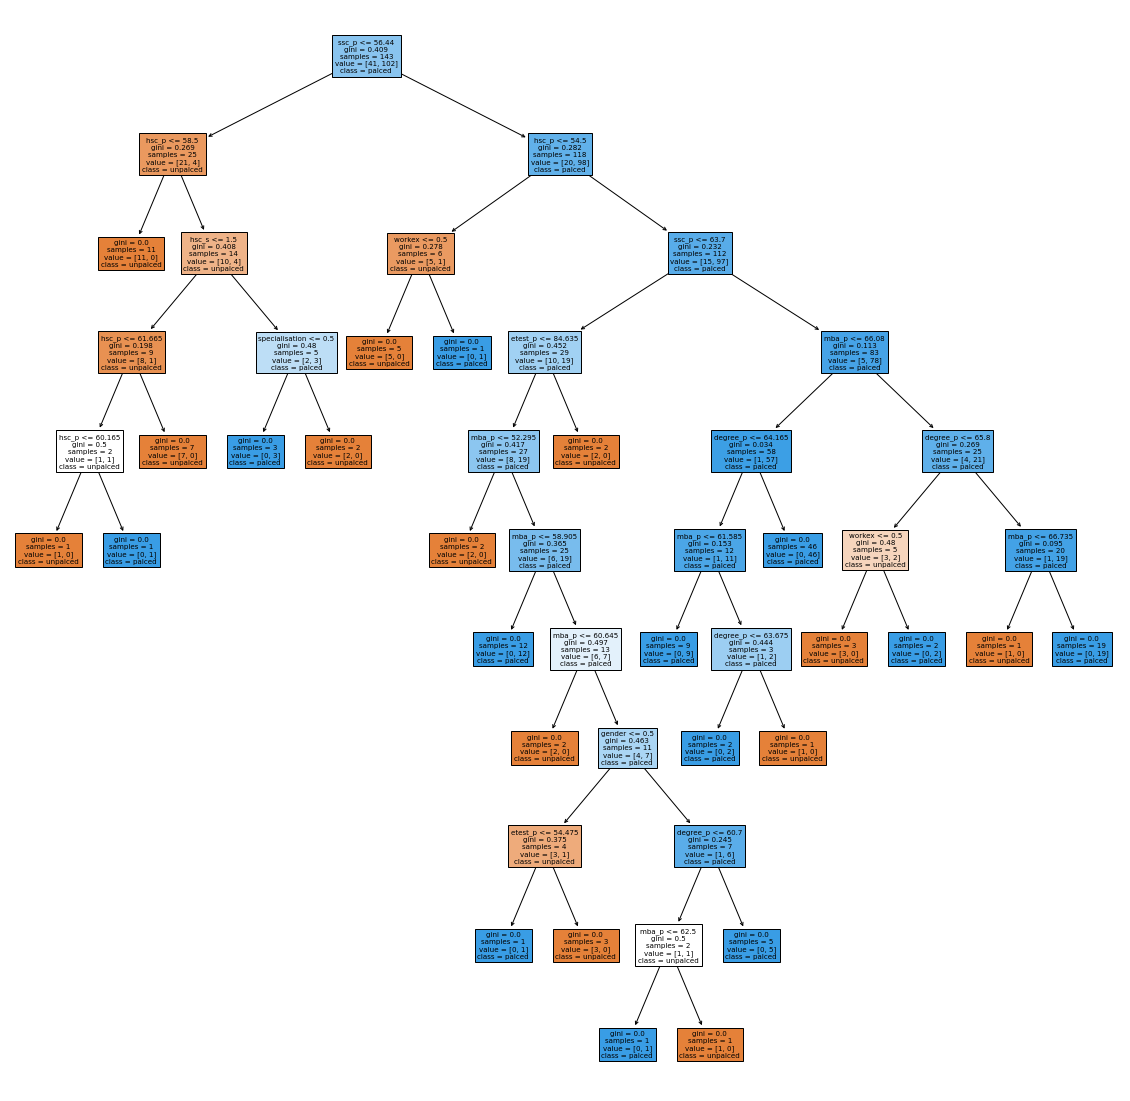

In [138]:
plt.figure(figsize=(20,20))
tree.plot_tree(dc,feature_names=df.columns[:-2],class_names=["unpalced","palced"],filled=True)
plt.show()

In [139]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


#***RANDOM FOREST CLASSIFIER***# 

In [140]:
n_estimators=[10,20,30,40,50,60,70,80,90,100,150]

In [141]:
max_features=["sqrt","log2"]

In [142]:
max_depth=np.linspace(10,120,10,dtype=int)

In [143]:
np.linspace(10,120,10,dtype=int)

array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120])

In [144]:
[int(x) for x in np.linspace(10,120,10)]

[10, 22, 34, 46, 58, 71, 83, 95, 107, 120]

In [145]:
criterion=["gini","entropy"]

In [146]:
min_samples_split=[2,4,6,8,10,12,14,16,18,20]

In [147]:
random_grid={"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "criterion":criterion,
             "min_samples_split":min_samples_split}

In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier() 

In [149]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
rscv=RandomizedSearchCV(estimator=rfc, param_distributions= random_grid,cv = 5, n_iter = 100, n_jobs = -1)

In [151]:
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         150]})

In [152]:
rscv.best_params_

{'n_estimators': 40,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 46,
 'criterion': 'gini'}

In [153]:
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150],
 'max_features': ['sqrt', 'log2'],
 'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

In [154]:
rfbp=RandomForestClassifier(n_estimators=40, min_samples_split=2,max_features="log2", max_depth= 120, criterion="gini")

In [155]:
rfbp.fit(x_train, y_train)

RandomForestClassifier(max_depth=120, max_features='log2', n_estimators=40)

In [156]:
y_pred=rfbp.predict(x_test)

In [157]:
accuracy_score(y_test, y_pred)

0.8387096774193549

In [158]:
confusion_matrix(y_test, y_pred)

array([[11, 10],
       [ 0, 41]])

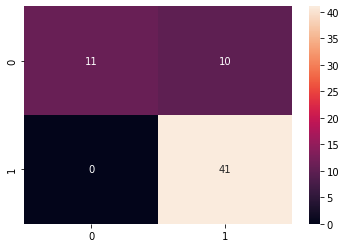

In [159]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [160]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.52      0.69        21
           1       0.80      1.00      0.89        41

    accuracy                           0.84        62
   macro avg       0.90      0.76      0.79        62
weighted avg       0.87      0.84      0.82        62



#**CLUSTRING MODEL**#


In [161]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [162]:
from sklearn.cluster import KMeans

In [163]:
df2=df

In [164]:
#k = how can cluster are there. 
kmeans=KMeans(3)

In [165]:
kmeans.fit(df2)
#fitting the 3 cluster 

KMeans(n_clusters=3)

In [166]:
kmeans.predict(df2)

array([0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2,
       2, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 1], dtype=int32)

In [167]:
df2["clusters"]=kmeans.predict(df2)

In [168]:
df2

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,1
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,2
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,0


In [169]:
#Evalution metrix and finding the intracluster Distance
kmeans.inertia_

252396669958.3418

In [170]:
df2=df2.reset_index()

In [171]:
df2

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,0
1,1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,0
2,2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,0
3,3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,1
4,4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,2
201,211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,0
202,212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,0
203,213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,0


**use elbow method to find the optimal number of clusters**


In [172]:
df.drop(columns=["clusters"],axis=1,inplace=True)

In [173]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [174]:
interia_list=[]
for i in range(1,10):
  kmeans=KMeans(i)
  kmeans.fit(df)
  interia_list.append(kmeans.inertia_)
  print(interia_list)

[4142725089851.2803]
[4142725089851.2803, 714487534483.8364]
[4142725089851.2803, 714487534483.8364, 252396669958.3418]
[4142725089851.2803, 714487534483.8364, 252396669958.3418, 153934019691.75497]
[4142725089851.2803, 714487534483.8364, 252396669958.3418, 153934019691.75497, 80731109870.26038]
[4142725089851.2803, 714487534483.8364, 252396669958.3418, 153934019691.75497, 80731109870.26038, 50409991594.120834]
[4142725089851.2803, 714487534483.8364, 252396669958.3418, 153934019691.75497, 80731109870.26038, 50409991594.120834, 29681690957.235363]
[4142725089851.2803, 714487534483.8364, 252396669958.3418, 153934019691.75497, 80731109870.26038, 50409991594.120834, 29681690957.235363, 17454965907.402668]
[4142725089851.2803, 714487534483.8364, 252396669958.3418, 153934019691.75497, 80731109870.26038, 50409991594.120834, 29681690957.235363, 17454965907.402668, 9640776781.429398]


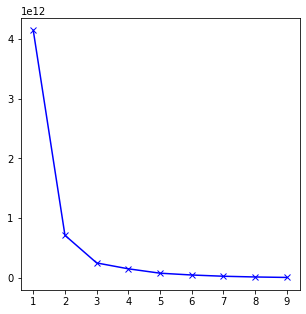

In [175]:
plt.figure(figsize=(5,5))
plt.plot(range(1,10),interia_list,"bx-")
plt.show()
#or we use marker="0"

In [176]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


#**PCA (Principal Component Analysis) model**#


In [177]:
new_data=df.drop(columns=["status","salary"],axis=1)

In [178]:
new_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [179]:
new_data.shape

(205, 12)

In [180]:
#we can drop the one hot label coding beacuse PCA is for countinous variable
new_data.drop(columns=["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation"], inplace=True)

In [181]:
new_data

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49
211,58.00,60.00,72.00,74.0,53.62
212,67.00,67.00,73.00,59.0,69.72
213,74.00,66.00,58.00,70.0,60.23


In [182]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [183]:
x_tranformed=ss.fit_transform(new_data)

In [184]:
x_tranformed

array([[-0.04854299,  2.5239358 , -1.16774627, -1.28939008, -0.60020802],
       [ 1.11371606,  1.21325415,  1.58041827,  1.12278123,  0.70561763],
       [-0.23706838,  0.14463999, -0.32128902,  0.24214726, -0.77478364],
       ...,
       [-0.04854299,  0.04119235,  0.94839685, -0.98308261,  1.30615777],
       [ 0.61129589, -0.0622553 , -1.16774627, -0.14073707, -0.35056488],
       [-0.51985647, -0.88983645, -1.87312731,  1.31422339, -0.35231064]])

In [185]:
from sklearn.decomposition import PCA

In [186]:
pca=PCA(n_components=4)

In [187]:
principal_components=pca.fit_transform(x_tranformed)

In [188]:
pca.explained_variance_ratio_

array([0.47892623, 0.17012592, 0.14484918, 0.11398508])

In [189]:
np.sum(pca.explained_variance_ratio_)

0.9078864020735873

In [190]:
pca_df=pd.DataFrame(data=principal_components,columns=["PC1","PC2","PC3","PC4"])

In [191]:
pca_df

,PC1,PC2,PC3,PC4
0,-0.076322,-1.610895,-1.266549,-2.350626
1,2.570507,0.259202,-0.312896,0.235926
2,-0.455466,0.309184,-0.691725,-0.199571
3,-2.606266,0.528010,0.556457,-0.395213
4,1.841010,1.251369,-1.999851,0.629781
...,...,...,...,...
200,3.517631,0.408958,0.743788,-0.307729
201,-0.950980,0.329839,-0.913846,1.189852
202,0.688240,-1.167359,1.211196,0.371614
203,-0.479008,0.066940,-0.360468,-0.581685


In [192]:
sub_df=df[["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation","status","salary"]]

In [193]:
sub_df

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,salary
0,1,1,1,1,2,0,1,1,270000.0
1,1,0,1,2,2,1,0,1,200000.0
2,1,0,0,0,0,0,0,1,250000.0
3,1,0,0,2,2,0,1,0,0.0
4,1,0,0,1,0,0,0,1,425000.0
...,...,...,...,...,...,...,...,...,...
210,1,1,1,1,0,0,0,1,400000.0
211,1,1,1,2,2,0,0,1,275000.0
212,1,1,1,1,0,1,0,1,295000.0
213,0,1,1,1,0,0,1,1,204000.0


In [194]:
from joblib.externals.cloudpickle.cloudpickle import Final
Final_df=pd.concat([pca_df,sub_df],axis=1)


In [195]:
Final_df.reset_index()

,index,PC1,PC2,PC3,PC4,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,salary
0,0,-0.076322,-1.610895,-1.266549,-2.350626,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,270000.0
1,1,2.570507,0.259202,-0.312896,0.235926,1.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,200000.0
2,2,-0.455466,0.309184,-0.691725,-0.199571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,250000.0
3,3,-2.606266,0.528010,0.556457,-0.395213,1.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0
4,4,1.841010,1.251369,-1.999851,0.629781,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,400000.0
210,211,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,275000.0
211,212,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,295000.0
212,213,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,204000.0


In [196]:
Final_df

,PC1,PC2,PC3,PC4,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,salary
0,-0.076322,-1.610895,-1.266549,-2.350626,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,270000.0
1,2.570507,0.259202,-0.312896,0.235926,1.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,200000.0
2,-0.455466,0.309184,-0.691725,-0.199571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,250000.0
3,-2.606266,0.528010,0.556457,-0.395213,1.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0
4,1.841010,1.251369,-1.999851,0.629781,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,400000.0
211,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,275000.0
212,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,295000.0
213,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,204000.0


In [197]:
Final_df.isnull().sum()

PC1               9
PC2               9
PC3               9
PC4               9
gender            9
ssc_b             9
hsc_b             9
hsc_s             9
degree_t          9
workex            9
specialisation    9
status            9
salary            9
dtype: int64

In [198]:
Final_df=Final_df.dropna()

In [199]:
x=Final_df.iloc[:,0:12].values
x

array([[-0.07632218, -1.61089497, -1.26654869, ...,  0.        ,
         1.        ,  1.        ],
       [ 2.57050668,  0.25920249, -0.31289573, ...,  1.        ,
         0.        ,  1.        ],
       [-0.45546558,  0.30918446, -0.69172539, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.68823956, -1.16735927,  1.21119616, ...,  0.        ,
         1.        ,  1.        ],
       [-0.47900793,  0.06693957, -0.36046776, ...,  0.        ,
         1.        ,  1.        ],
       [-1.33827139,  1.91491907,  0.10371762, ...,  1.        ,
         0.        ,  1.        ]])

In [200]:
y=Final_df["salary"].values
y

array([270000., 200000., 250000.,      0., 425000.,      0.,      0.,
       252000., 231000.,      0., 260000., 250000.,      0., 218000.,
            0., 200000., 300000.,      0.,      0., 236000., 265000.,
       393000., 360000., 300000.,      0., 240000., 265000., 350000.,
            0., 250000.,      0., 278000., 260000.,      0., 300000.,
            0., 320000., 240000., 411000., 287000.,      0., 300000.,
       200000.,      0.,      0., 204000., 250000., 200000.,      0.,
            0., 450000., 216000., 220000., 240000., 360000., 268000.,
       265000., 260000., 300000., 240000.,      0., 240000.,      0.,
       275000., 275000.,      0., 275000., 360000., 240000., 240000.,
       218000., 336000.,      0., 230000., 500000., 270000.,      0.,
       240000., 300000.,      0., 300000., 300000., 400000., 220000.,
            0., 210000., 210000., 300000.,      0., 230000.,      0.,
       260000., 420000., 300000.,      0., 220000.,      0.,      0.,
       380000., 3000

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [203]:
#linear Regression
from sklearn.linear_model import LinearRegression
le=LinearRegression()

In [204]:
reg.fit(x_train,y_train)

LinearRegression()

In [205]:
y_pred=reg.predict(x_test)
y_pred

array([ 15002.65495655,  15649.72028051, 314635.33297314,  24416.14795346,
       253241.47257007, 264467.78988719, 270534.76385608, 312132.65386859,
       325529.60636768,   9571.47035189, 256860.15593539,   3062.20332643,
       291509.4403771 , 243308.55504941, 264183.40809954,  -4909.05638659,
       282117.71616201, 271071.80731461, 271033.50062168, -10204.15802797,
       308541.56545613, 286318.83419457, -29204.37954925, 252729.11149318,
       303594.8540709 , 299499.17814633, 243966.90496374, 305898.52403936,
       296828.61687721, 252777.89109531, 289706.46038265, 240094.63158987,
       280413.21833463, 255573.3632627 , 295640.76097184,  19271.35770763,
       279242.6238204 , 276851.75137688,  -2084.66270892, 260746.90077053,
       300055.50044337, 317906.04670199, 266401.75319953,  22587.37376296,
       276282.12551776,  -5301.98907682,   -383.62280977,  -7639.31666153,
         3863.32614375])

In [206]:
from sklearn import metrics

In [207]:
#With the Help of PCA model we get 78% Accuracy in liner regression model.
R2 = metrics.r2_score(y_test,y_pred)
R2

0.7836271785869842